In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [309]:
df = pd.read_csv('./data/brilliance_2.csv')
print(df.shape)
df.Price.describe()

(23343, 19)


count     23343
unique     7485
top        $699
freq         59
Name: Price, dtype: object

In [310]:
df.columns

Index(['Unnamed: 0', 'Shape', 'Carat Weight', 'Color', 'Clarity', 'Cut',
       'Certification', 'Depth %', 'Table %', 'Polish', 'Symmetry',
       'Cut Grade', 'Measurements', 'Length to Width', 'Girdle', 'Culet',
       'Fluorescence', 'Stock Number', 'Price'],
      dtype='object')

In [311]:
# fix price formatting
df['Price'] = df['Price'].map(lambda x: x.replace('$',''))
df['Price'] = df['Price'].map(lambda x: x.replace(',',''))
df['Price'] = df['Price'].astype(int)

In [312]:
df['Price'].dtypes

dtype('int64')

In [313]:
df.sort_values(['Price'], inplace = True)
df.head(2)

,Unnamed: 0,Shape,Carat Weight,Color,Clarity,Cut,Certification,Depth %,Table %,Polish,Symmetry,Cut Grade,Measurements,Length to Width,Girdle,Culet,Fluorescence,Stock Number,Price
14511,14511,Round,0.30 ct.,K,SI1,Ideal,GIA,62.8 %,55 %,Excellent,Very Good,Very Good,4.27x4.29x2.69 mm,1.0,Medium - Sl. Thick,None,Faint,D113696493,314
5628,5628,Round,0.30 ct.,K,SI1,Ideal,GIA,62.8 %,55 %,Excellent,Very Good,Very Good,4.27x4.29x2.69 mm,1.0,Medium - Sl. Thick,None,Faint,D113696493,314


<AxesSubplot:xlabel='Price', ylabel='Count'>

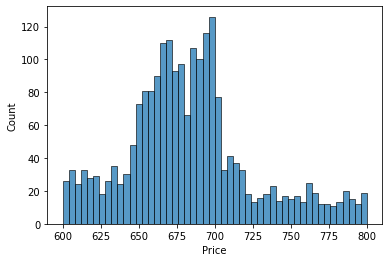

In [314]:
# excess amount of samples between $600 and $800 -- deal with later
sns.histplot(data=df,x='Price',bins=50,binrange=(600,800))

In [315]:
# drop two columns
df.drop(['Unnamed: 0','Shape','Certification'],axis=1,inplace=True)

In [316]:
df['Carat Weight'] = df['Carat Weight'].map(lambda x: x.replace('ct.',''))
df['Carat Weight'] = df['Carat Weight'].astype(float)

In [317]:
df[['Depth %', 'Table %']] = df[['Depth %', 'Table %']].apply(lambda x: x.str.replace('%','').str.strip()).astype(float)
df.head()

,Carat Weight,Color,Clarity,Cut,Depth %,Table %,Polish,Symmetry,Cut Grade,Measurements,Length to Width,Girdle,Culet,Fluorescence,Stock Number,Price
14511,0.3,K,SI1,Ideal,62.8,55.0,Excellent,Very Good,Very Good,4.27x4.29x2.69 mm,1.0,Medium - Sl. Thick,None,Faint,D113696493,314
5628,0.3,K,SI1,Ideal,62.8,55.0,Excellent,Very Good,Very Good,4.27x4.29x2.69 mm,1.0,Medium - Sl. Thick,None,Faint,D113696493,314
14814,0.3,K,SI1,Ideal,62.8,55.0,Excellent,Very Good,Very Good,4.27x4.29x2.69 mm,1.0,Medium - Sl. Thick,None,Faint,D113696493,314
4191,0.3,K,SI1,Ideal,62.8,55.0,Excellent,Very Good,Very Good,4.27x4.29x2.69 mm,1.0,Medium - Sl. Thick,None,Faint,D113696493,314
2415,0.3,K,SI1,Ideal,62.8,55.0,Excellent,Very Good,Very Good,4.27x4.29x2.69 mm,1.0,Medium - Sl. Thick,None,Faint,D113696493,314


In [318]:
print(df['Color'].value_counts(),'\n')
color_d = {'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7,'K':8}
df['Color'] = df['Color'].map(color_d)
df['Color']

D    4515
E    3843
F    3488
G    3276
H    2578
I    2164
J    2044
K    1435
Name: Color, dtype: int64 



14511    8
5628     8
14814    8
4191     8
2415     8
        ..
14506    1
14507    4
14508    3
14509    6
14510    7
Name: Color, Length: 23343, dtype: int64

In [319]:
print(df['Clarity'].value_counts(),'\n')
clar_d = {'FL':1,'IF':2,'VVS1':3,'VVS2':4,'VS1':5,'VS2':6,'SI1':7,'SI2':8}
df['Clarity'] = df['Clarity'].map(clar_d)
df['Clarity']

VS1     5053
VS2     4584
VVS2    3827
SI1     3299
VVS1    2688
SI2     2244
IF      1492
FL       156
Name: Clarity, dtype: int64 



14511    7
5628     7
14814    7
4191     7
2415     7
        ..
14506    5
14507    6
14508    6
14509    4
14510    6
Name: Clarity, Length: 23343, dtype: int64

In [320]:
print(df['Cut'].value_counts(),'\n')
cut_d = {'Super Ideal':1, 'Ideal':2,'Excellent':3,'Very Good':4, 'Good':5}
df['Cut'] = df['Cut'].map(cut_d)
df['Cut']

Super Ideal    15766
Ideal           3178
Excellent       2309
Very Good       1781
Good             309
Name: Cut, dtype: int64 



14511    2
5628     2
14814    2
4191     2
2415     2
        ..
14506    3
14507    1
14508    1
14509    5
14510    1
Name: Cut, Length: 23343, dtype: int64

In [321]:
print(df['Polish'].value_counts(),'\n')
pol_d = {'Excellent':1,'Very Good':2,'Good':3}
df['Polish'] = df['Polish'].map(pol_d)
df['Polish']

Excellent    21622
Very Good     1638
Good            83
Name: Polish, dtype: int64 



14511    1
5628     1
14814    1
4191     1
2415     1
        ..
14506    1
14507    1
14508    1
14509    1
14510    1
Name: Polish, Length: 23343, dtype: int64

In [322]:
print(df['Symmetry'].value_counts(),'\n')
sym_d = {'Excellent':1,'Very Good':2,'Good':3}
df['Symmetry'] = df['Symmetry'].map(sym_d)
df['Symmetry']

Excellent    18218
Very Good     4547
Good           578
Name: Symmetry, dtype: int64 



14511    2
5628     2
14814    2
4191     2
2415     2
        ..
14506    1
14507    1
14508    1
14509    2
14510    1
Name: Symmetry, Length: 23343, dtype: int64

In [323]:
print(df['Cut Grade'].value_counts())
cut_d = {'Excellent':1,'Very Good':2,'Good':3,'Fair':4,'Poor':5}
df['Cut Grade'] = df['Cut Grade'].map(cut_d)
df['Cut Grade']

Excellent    18247
Very Good     4134
Good           844
Fair           115
Poor             3
Name: Cut Grade, dtype: int64


14511    2
5628     2
14814    2
4191     2
2415     2
        ..
14506    2
14507    1
14508    1
14509    3
14510    1
Name: Cut Grade, Length: 23343, dtype: int64

In [324]:
df.dtypes

Carat Weight       float64
Color                int64
Clarity              int64
Cut                  int64
Depth %            float64
Table %            float64
Polish               int64
Symmetry             int64
Cut Grade            int64
Measurements        object
Length to Width    float64
Girdle              object
Culet               object
Fluorescence        object
Stock Number        object
Price                int64
dtype: object

In [325]:
df['Culet'].value_counts()
culet_d = {'None':1, 'Very Small':2,'Small':3,'Medium':4}
df['Culet'] = df['Culet'].map(culet_d)
df['Culet'].fillna(value=0, inplace = True)
df['Culet'] = df['Culet'].astype(int

In [380]:
df['Culet'].value_counts()

1    19410
0     3684
2       94
3       13
4        4
Name: Culet, dtype: int64

In [327]:
df['Fluorescence'].value_counts()
flo_d = {'None':0,'Faint':1,'Medium':2,'Strong':3}
df['Fluorescence'] = df['Fluorescence'].map(flo_d)
df['Fluorescence']

14511    1
5628     1
14814    1
4191     1
2415     1
        ..
14506    0
14507    0
14508    0
14509    2
14510    0
Name: Fluorescence, Length: 23343, dtype: int64

In [328]:
df_idk = df[['Girdle', 'Measurements', 'Stock Number']]
df_idk.head()
df.drop(['Girdle','Measurements','Stock Number'],axis=1,inplace=True)
df.head()

,Carat Weight,Color,Clarity,Cut,Depth %,Table %,Polish,Symmetry,Cut Grade,Length to Width,Culet,Fluorescence,Price
14511,0.3,8,7,2,62.8,55.0,1,2,2,1.0,1,1,314
5628,0.3,8,7,2,62.8,55.0,1,2,2,1.0,1,1,314
14814,0.3,8,7,2,62.8,55.0,1,2,2,1.0,1,1,314
4191,0.3,8,7,2,62.8,55.0,1,2,2,1.0,1,1,314
2415,0.3,8,7,2,62.8,55.0,1,2,2,1.0,1,1,314


In [329]:
df.drop(df[df['Price'] < 500].index, inplace = True)

In [383]:
df.to_csv('./data/brilliance_clean.csv',index=False)

<AxesSubplot:>

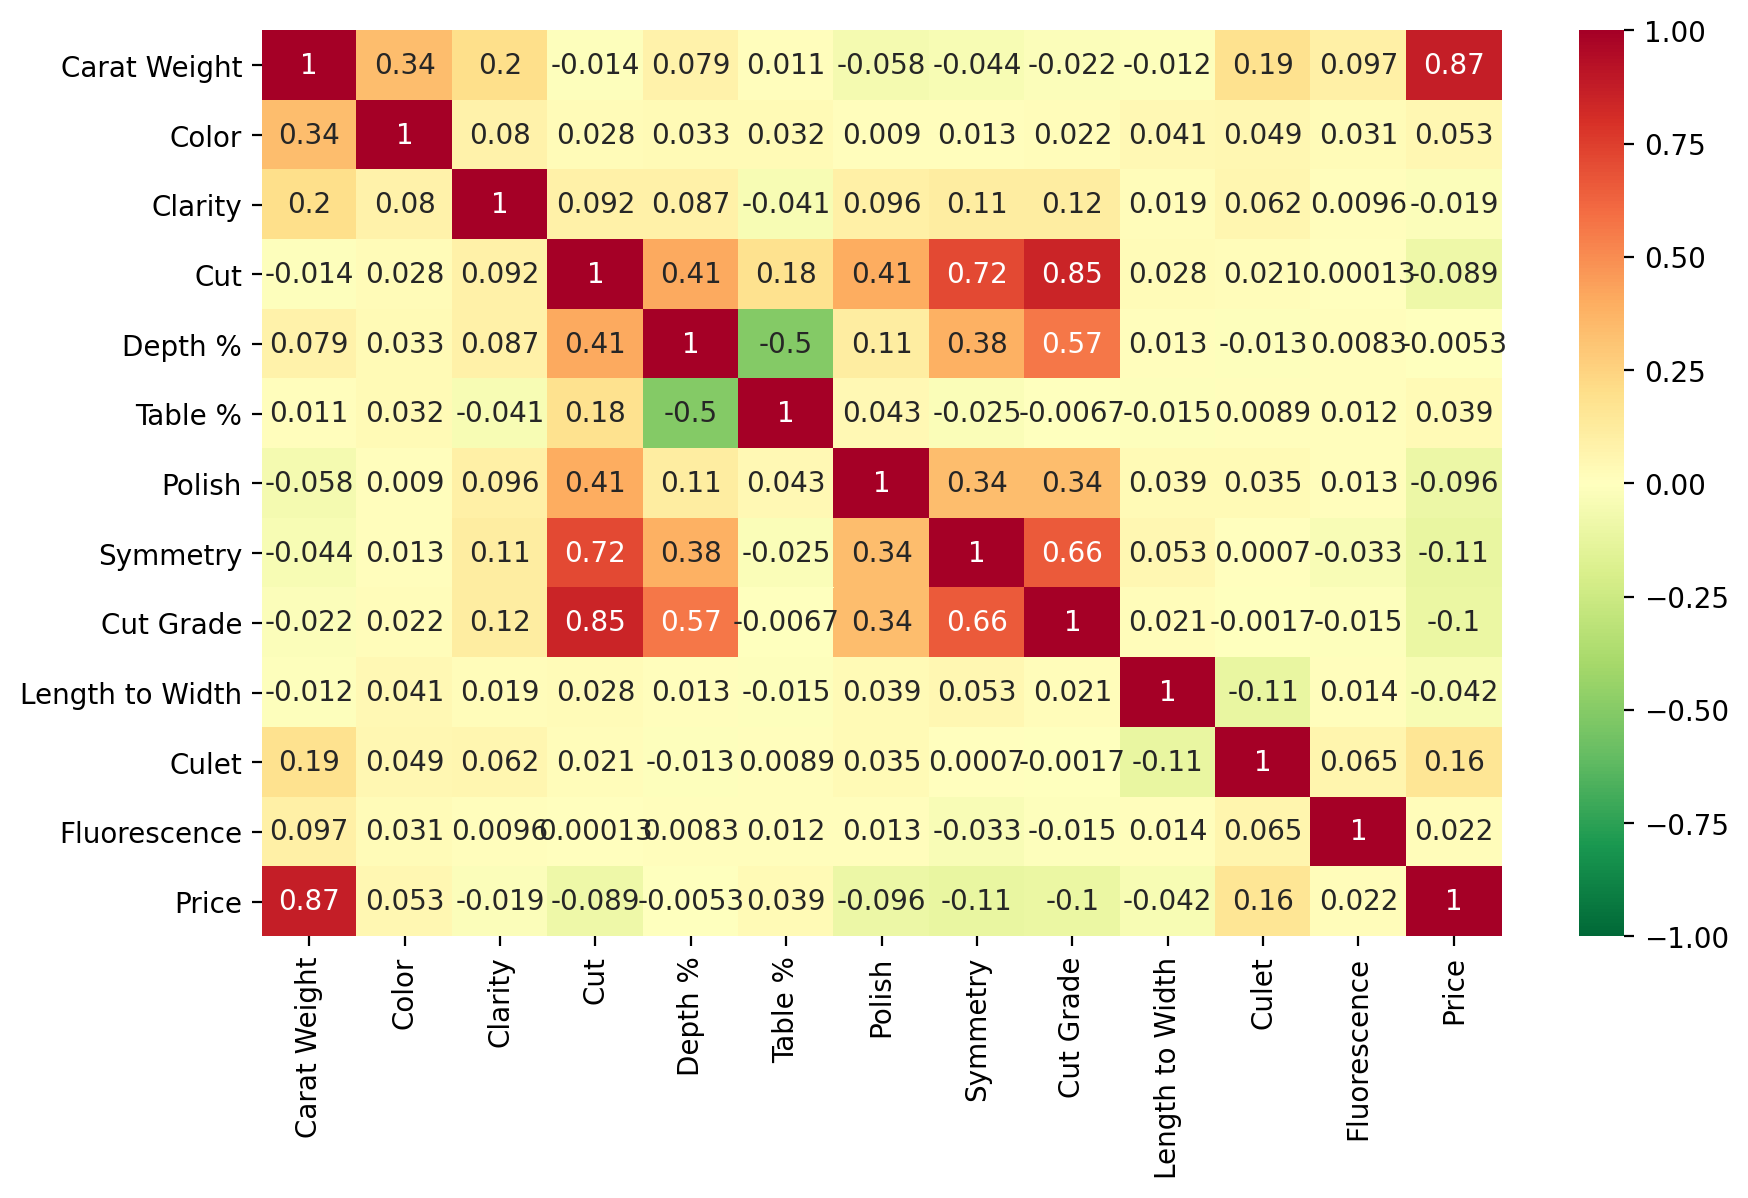

In [331]:
plt.figure(figsize=(10,6),dpi=200)
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap="RdYlGn_r")

# MULTIPLE LINEAR REGRESSION

In [332]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn import metrics
import scipy.stats as stats

In [382]:
df.columns

Index(['Carat Weight', 'Color', 'Clarity', 'Cut', 'Depth %', 'Table %',
       'Polish', 'Symmetry', 'Cut Grade', 'Length to Width', 'Culet',
       'Fluorescence', 'Price'],
      dtype='object')

In [334]:
mfc = ['Carat Weight', 'Color', 'Clarity', 'Cut', 'Depth %', 'Table %',
       'Polish', 'Symmetry', 'Cut Grade', 'Length to Width', 'Culet',
       'Fluorescence']
X = df[mfc]
y = df.Price

In [348]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [349]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=12)

In [350]:
X_tr.size

167076

In [351]:
y_tr.shape

(13923,)

In [336]:
# TRAIN (66% of 75%)
# X_tr, y_tr

# VALIDATE (33% of 75%)
# X_val, y_val

# TEST (25% of data)
# X_test, y_test

In [352]:
lr = LinearRegression()
lr.fit(X_tr,y_tr)

LinearRegression()

### Coefficients

In [353]:
list(zip(mfc,lr.coef_))

[('Carat Weight', 9202.146013099846),
 ('Color', -384.17983213089474),
 ('Clarity', -334.8923949596973),
 ('Cut', -102.51450036788383),
 ('Depth %', -65.68764945932315),
 ('Table %', 30.239712890835335),
 ('Polish', 3.9093978004530427),
 ('Symmetry', -18.434445871240985),
 ('Cut Grade', -29.197940169120994),
 ('Length to Width', -602.5065876967814),
 ('Culet', -43.93071150098659),
 ('Fluorescence', -224.45477541970644)]

In [354]:
# predict on training set
yhat_tr = lr.predict(X_tr)

In [355]:
# predict on val set
yhat_val = lr.predict(X_val)

### Metrics

In [356]:
print('Training Predictions RSQ:',metrics.r2_score(y_tr, yhat_tr))
print('Val Predictions RSQ:',metrics.r2_score(y_val, yhat_val))

Training Predictions RSQ: 0.8785840296341266
Val Predictions RSQ: 0.8760936267767768


In [357]:
print('Training Predictions MAE:',metrics.mean_absolute_error(y_tr, yhat_tr))
print('Val Predictions MAE:',metrics.mean_absolute_error(y_val, yhat_val))

Training Predictions MAE: 815.9049499721851
Val Predictions MAE: 819.3208770295366


In [358]:
print('Training Predictions RMAE:',np.sqrt(metrics.mean_squared_error(y_tr, yhat_tr)))
print('Val Predictions RMAE:',np.sqrt(metrics.mean_squared_error(y_val, yhat_val)))

Training Predictions RMAE: 1069.467527489309
Val Predictions RMAE: 1083.2074501180477


### Residuals

In [359]:
val_res = y_val - yhat_val

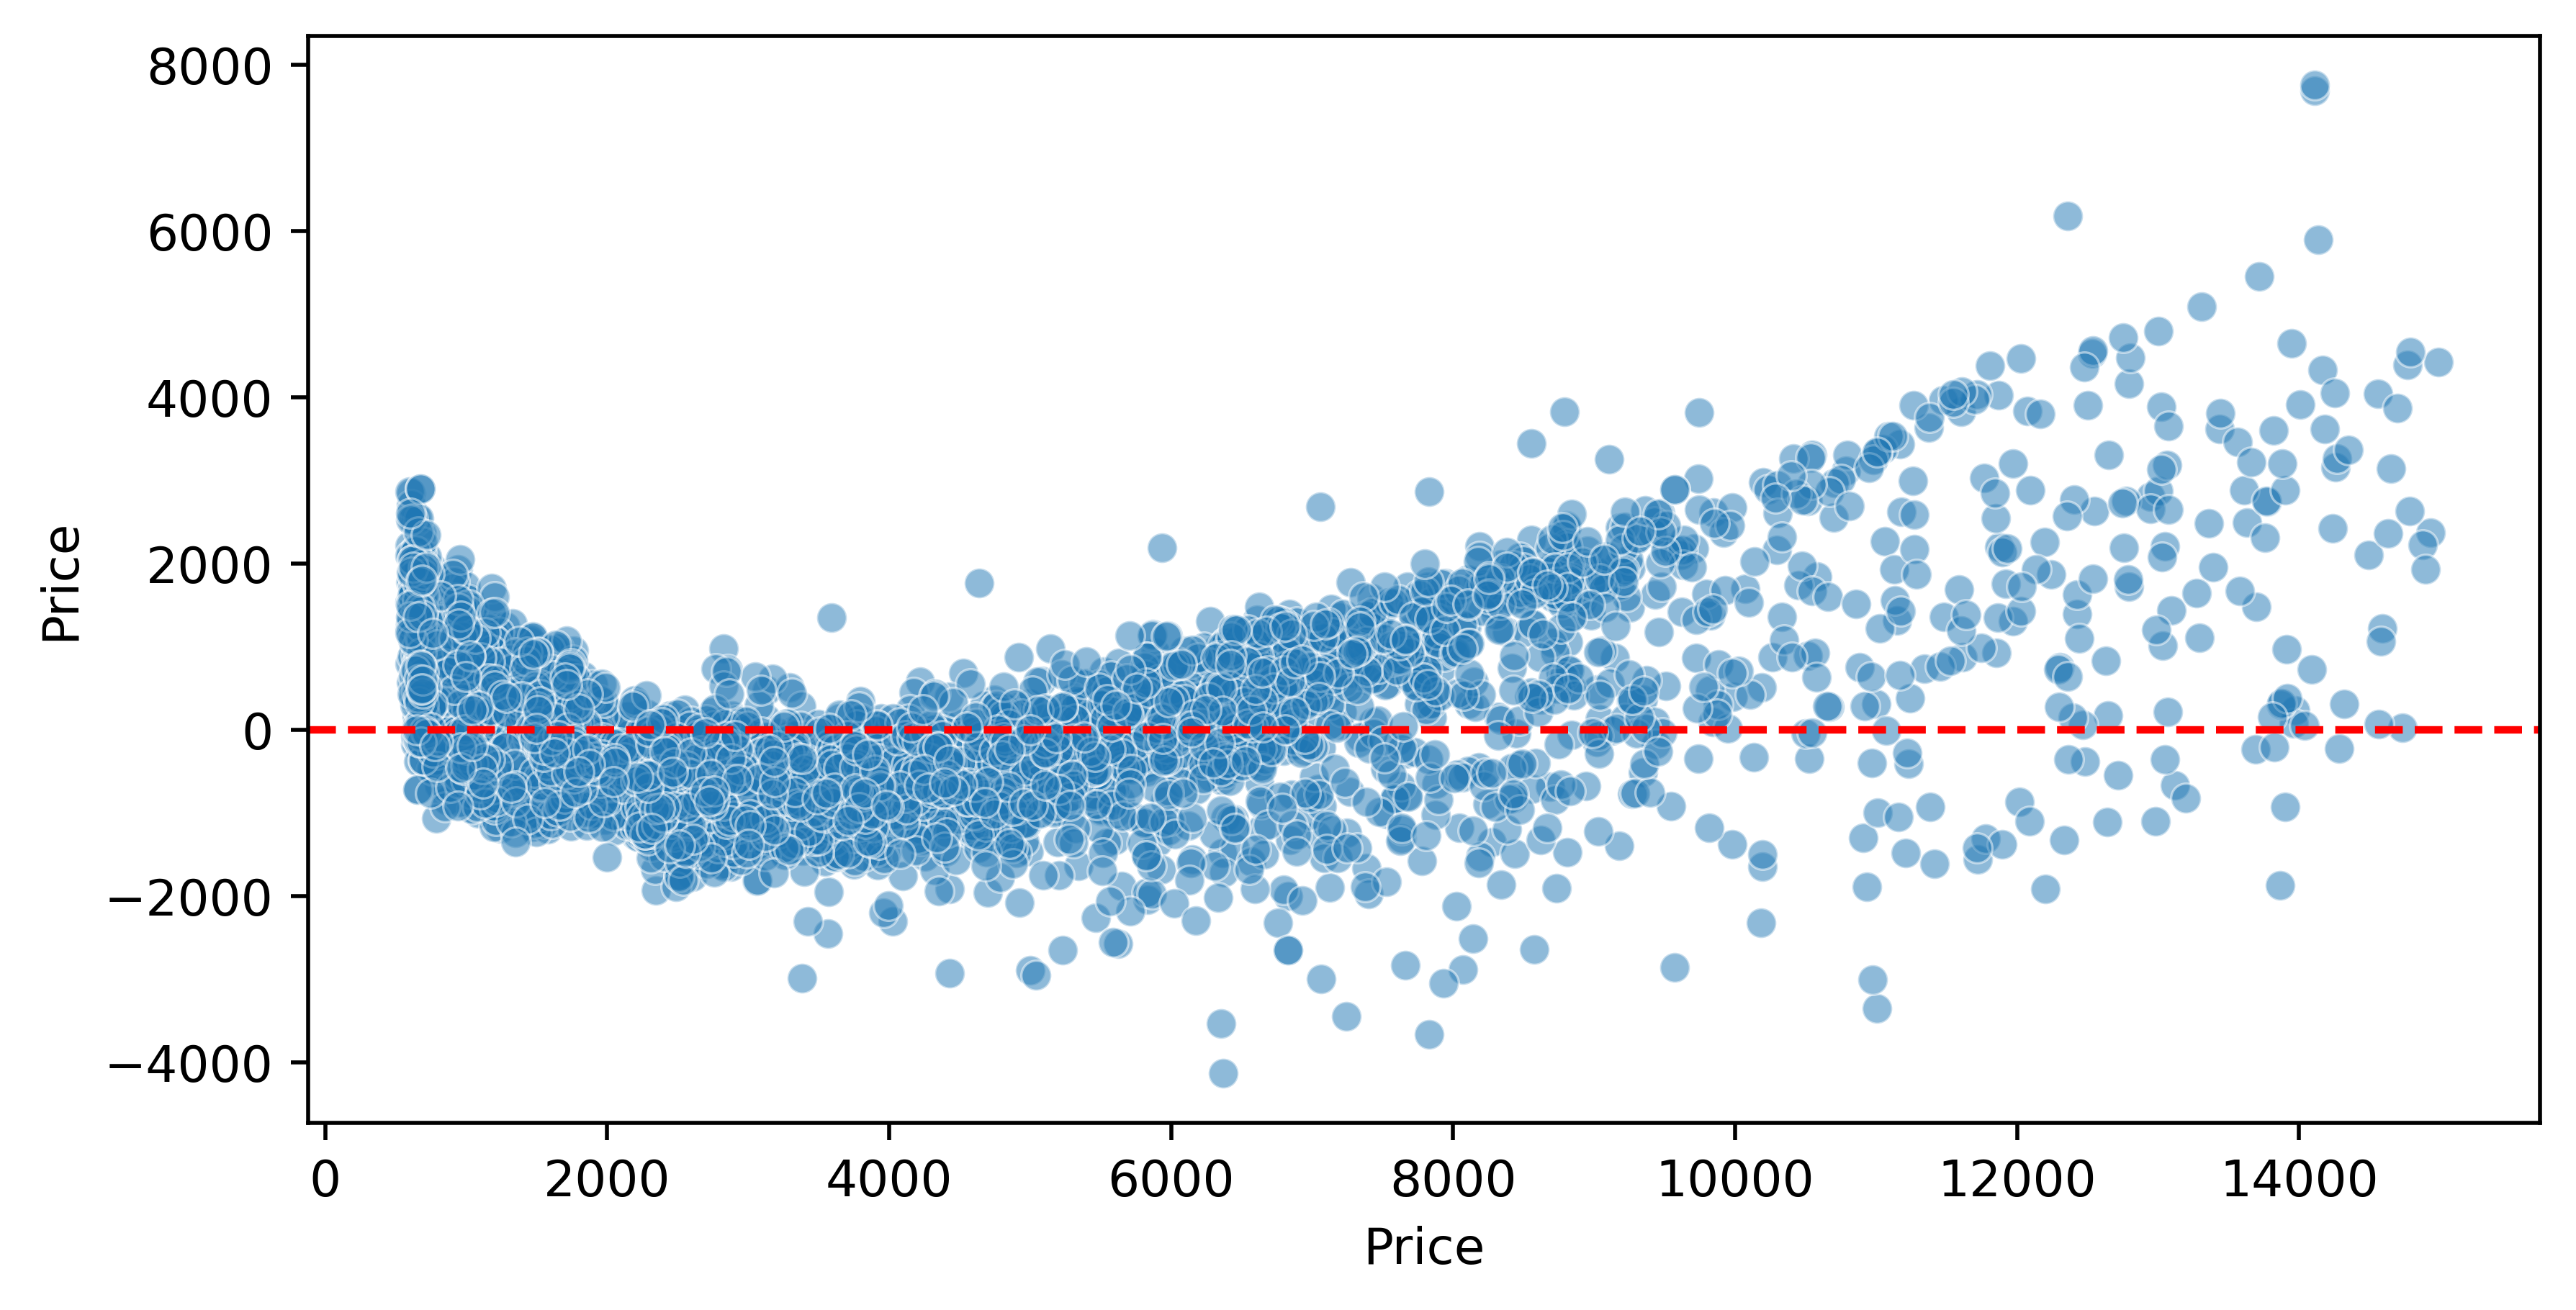

In [360]:
fig = plt.figure(figsize=(8,4),dpi=500)
sns.scatterplot(x=y_val,y=val_res,alpha=.5)
plt.axhline(y=0,color='r',ls='--')

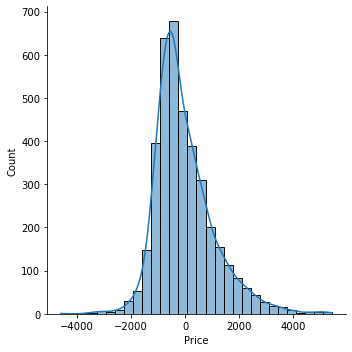

In [289]:
sns.displot(val_res,bins=30,kde=True)

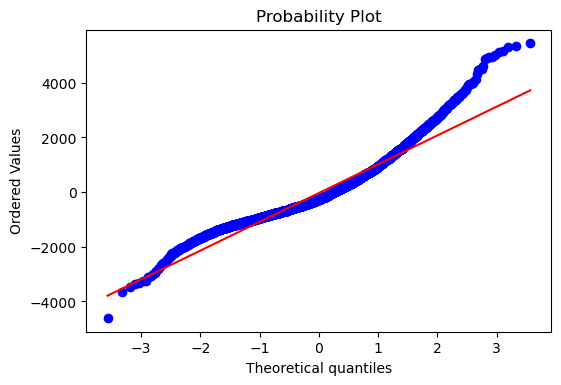

In [290]:
fig,ax = plt.subplots(figsize=(6,4),dpi=100)
_ = stats.probplot(val_res,plot=ax)

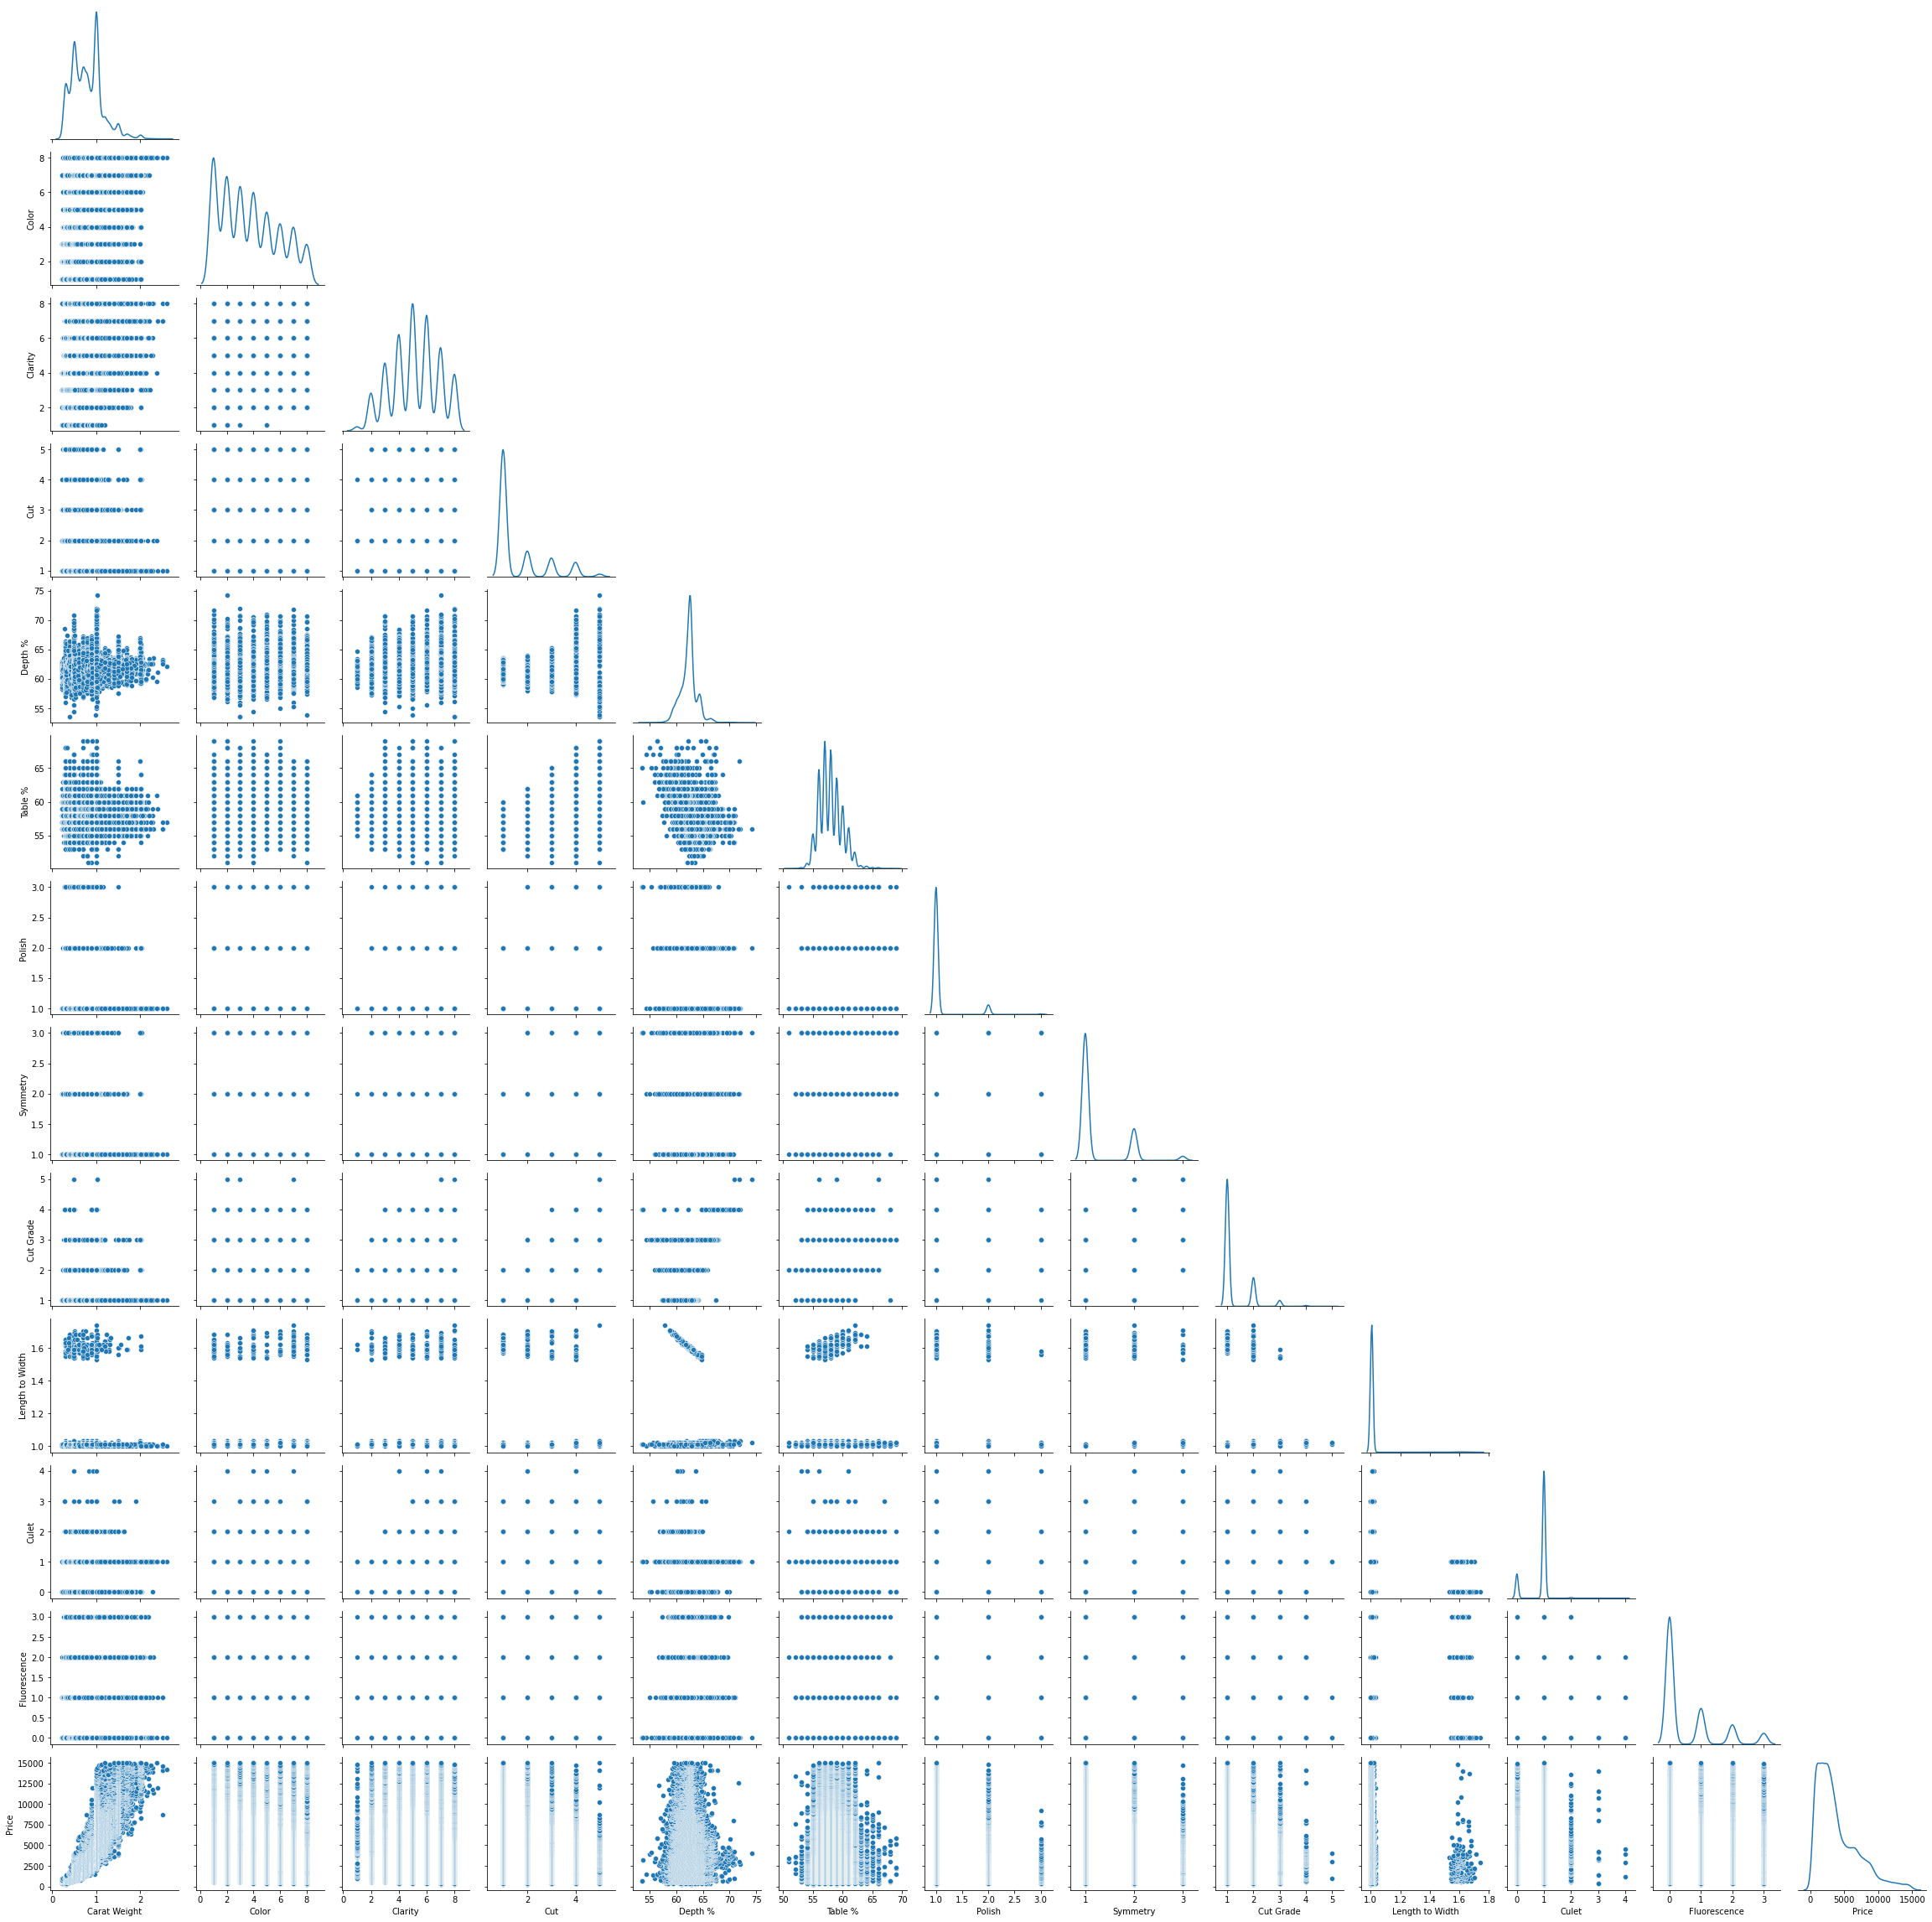

In [291]:
g = sns.PairGrid(df, diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

# Polynomial Linear Regression